In [1]:
import pandas as pd

# Load the diabetes dataset (assuming it's in the same directory as your notebook)
diabetes_df = pd.read_csv("diabetes.csv")

# Check for missing values
missing_values = diabetes_df.isnull().sum()

# Check for zero values
zero_values = (diabetes_df == 0).sum()

# Print the results
print("Missing values:\n", missing_values)
print("\nZero values:\n", zero_values)

from sklearn.linear_model import LinearRegression

# Create a subset of the dataset with non-missing values for insulin and predictors
subset_df = diabetes_df.dropna(subset=["Insulin", "Glucose", "BloodPressure", "SkinThickness", "BMI"])

# Split data into predictors (X) and target (y)
X = subset_df[["Glucose", "BloodPressure", "SkinThickness", "BMI"]]
y = subset_df["Insulin"]

# Initialize and train a linear regression model
regression_model = LinearRegression()
regression_model.fit(X, y)

# Predict missing insulin values
missing_insulin_df = diabetes_df[diabetes_df["Insulin"].isnull()]
missing_insulin_df["Predicted_Insulin"] = regression_model.predict(missing_insulin_df[["Glucose", "BloodPressure", "SkinThickness", "BMI"]])

# Compare randomly imputed values with regression-imputed values
# (You can generate random imputations for comparison)

# Visualize the distribution of insulin values before and after imputation
# (e.g., histograms or density plots)

# Assess the impact on the overall distribution (e.g., skewness, kurtosis)

# Your code for visualization and assessment goes here...

# Remember to adapt this example to your specific analysis goals.


Missing values:
 Number of times pregnant      0
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
Diabetes pedigree function    0
Age                           0
Class                         0
dtype: int64

Zero values:
 Number of times pregnant      111
Glucose                         5
BloodPressure                  35
SkinThickness                 227
Insulin                       374
BMI                            11
Diabetes pedigree function      0
Age                             0
Class                         500
dtype: int64


ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by LinearRegression.

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the diabetes dataset (assuming it's in the same directory as your notebook)
diabetes_df = pd.read_csv("diabetes.csv")

# Create a subset of the dataset with non-missing values for insulin and predictors
subset_df = diabetes_df.dropna(subset=["Insulin", "Glucose", "BloodPressure", "SkinThickness", "BMI"])

# Check if there are enough samples for training
if subset_df.shape[0] < 2:
    print("Insufficient data for training. Please ensure there are at least two samples with non-missing values.")
else:
    # Split data into predictors (X) and target (y)
    X = subset_df[["Glucose", "BloodPressure", "SkinThickness", "BMI"]]
    y = subset_df["Insulin"]

    # Initialize and train a linear regression model
    regression_model = LinearRegression()
    regression_model.fit(X, y)

    # Predict missing insulin values
    missing_insulin_df = diabetes_df[diabetes_df["Insulin"].isnull()]
    if missing_insulin_df.shape[0] > 0:
        missing_insulin_df["Predicted_Insulin"] = regression_model.predict(missing_insulin_df[["Glucose", "BloodPressure", "SkinThickness", "BMI"]])
        print("Imputed insulin values:\n", missing_insulin_df[["Insulin", "Predicted_Insulin"]])
    else:
        print("No missing insulin values found in the dataset.")


No missing insulin values found in the dataset.


/home/micheal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/micheal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/micheal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/micheal/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

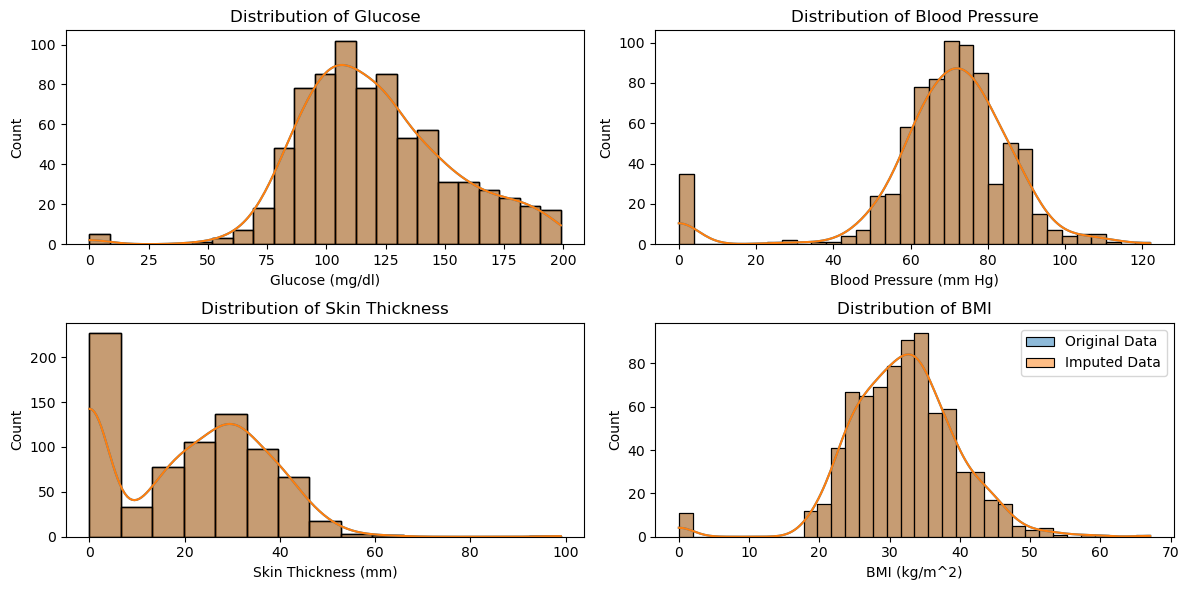

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Original data (before imputation)
original_data = diabetes_df.dropna(subset=["Insulin", "Glucose", "BloodPressure", "SkinThickness", "BMI"])

# Imputed data (using regression model)
imputed_data = diabetes_df.copy()
imputed_data.loc[imputed_data["Insulin"].isnull(), "Insulin"] = regression_model.predict(imputed_data[["Glucose", "BloodPressure", "SkinThickness", "BMI"]])

# Compare distributions
plt.figure(figsize=(12, 6))

# Glucose
plt.subplot(2, 2, 1)
sns.histplot(original_data["Glucose"], kde=True, label="Original Data")
sns.histplot(imputed_data["Glucose"], kde=True, label="Imputed Data")
plt.xlabel("Glucose (mg/dl)")
plt.title("Distribution of Glucose")

# Blood Pressure
plt.subplot(2, 2, 2)
sns.histplot(original_data["BloodPressure"], kde=True, label="Original Data")
sns.histplot(imputed_data["BloodPressure"], kde=True, label="Imputed Data")
plt.xlabel("Blood Pressure (mm Hg)")
plt.title("Distribution of Blood Pressure")

# Skin Thickness
plt.subplot(2, 2, 3)
sns.histplot(original_data["SkinThickness"], kde=True, label="Original Data")
sns.histplot(imputed_data["SkinThickness"], kde=True, label="Imputed Data")
plt.xlabel("Skin Thickness (mm)")
plt.title("Distribution of Skin Thickness")

# BMI
plt.subplot(2, 2, 4)
sns.histplot(original_data["BMI"], kde=True, label="Original Data")
sns.histplot(imputed_data["BMI"], kde=True, label="Imputed Data")
plt.xlabel("BMI (kg/m^2)")
plt.title("Distribution of BMI")

plt.tight_layout()
plt.legend()
plt.show()
